## RFM Analysis

### Introduction

**Customer segmentation** is the process of grouping customers based on shared characteristics. These segments are valuable for marketing campaigns, identifying high-potential customers, and fostering customer loyalty. Companies may segment customers using various factors, such as demographics (age, gender, location), behavior (purchase history, response to messaging), and psychographics (values, interests, lifestyles), among others.

**RFM (Recency-Frequency-Monetary) analysis** is a  technique for behaviour based customer segmentation. We often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

The goal of this analysis is to identify customer segments for a local retail company using RFM (Recency, Frequency, Monetary) analysis and to explore the differences between these segments.

### Import Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Loading the Data

In [10]:
df = pd.read_excel('C:/Users/Administrator/Documents/Транзакции.xlsx')

In [11]:
df

,OrderId,DateTime,TotalPrice,DeliveryCost,City,LineQuantity,BasePricePerItem,PriceOfLine,Status,CustomerId
0,1840903.0,2021-03-11 05:25:43,3072.8,0.0,Лобня,1.0,1840.0,1472.0,CourierService,876.0
1,1840903.0,2021-03-11 05:25:43,3072.8,0.0,Лобня,1.0,483.0,386.4,CourierService,876.0
2,1840903.0,2021-03-11 05:25:43,3072.8,0.0,Лобня,1.0,1518.0,1214.4,CourierService,876.0
3,1840903.0,2021-03-11 05:25:43,3072.8,0.0,Лобня,1.0,0.0,0.0,CourierService,876.0
4,1840903.0,2021-03-11 05:25:43,3072.8,0.0,Лобня,1.0,0.0,0.0,CourierService,876.0
...,...,...,...,...,...,...,...,...,...,...
1048570,1944913.0,2021-07-15 16:02:33,5340.8,0.0,Москва,2.0,2392.0,3827.2,Delivered,6685371.0
1048571,1944913.0,2021-07-15 16:02:33,5340.8,0.0,Москва,1.0,0.0,0.0,Delivered,6685371.0
1048572,1944913.0,2021-07-15 16:02:33,5340.8,0.0,Москва,1.0,0.0,0.0,Delivered,6685371.0
1048573,1944913.0,2021-07-15 16:02:33,5340.8,0.0,Москва,1.0,0.0,0.0,Delivered,6685371.0


### Data Inspection

In [13]:
#  Return a tuple containing the number of rows and columns
df.shape

(1048575, 10)

In [14]:
# Checking for missing data
missing_data = df.isnull().sum()

# Display columns with missing data
print("Missing data in columns:")
print(missing_data[missing_data > 0])

Missing data in columns:
OrderId                 3
DateTime                3
TotalPrice              3
DeliveryCost         2037
City                55351
LineQuantity            6
BasePricePerItem    54970
PriceOfLine             6
Status                  6
CustomerId              6
dtype: int64


In [15]:
# Print information about the DataFrame - quality of data & non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   OrderId           1048572 non-null  float64       
 1   DateTime          1048572 non-null  datetime64[ns]
 2   TotalPrice        1048572 non-null  float64       
 3   DeliveryCost      1046538 non-null  float64       
 4   City              993224 non-null   object        
 5   LineQuantity      1048569 non-null  float64       
 6   BasePricePerItem  993605 non-null   float64       
 7   PriceOfLine       1048569 non-null  float64       
 8   Status            1048569 non-null  object        
 9   CustomerId        1048569 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 80.0+ MB


In [16]:
# Return a statistically description of the data - numerical columns
df.describe()

,OrderId,DateTime,TotalPrice,DeliveryCost,LineQuantity,BasePricePerItem,PriceOfLine,CustomerId
count,1.048572e+06,1048572,1.048572e+06,1.046538e+06,1.048569e+06,9.936050e+05,1.048569e+06,1.048569e+06
mean,1.580852e+06,2020-03-19 05:19:27.668636672,3.937305e+03,2.643610e+01,1.035488e+00,2.393153e+05,7.196320e+02,4.694859e+06
min,1.863210e+05,2013-08-07 12:27:41,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,8.760000e+02
25%,1.375228e+06,2019-06-14 16:42:22,2.720120e+03,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.349705e+06
50%,1.514327e+06,2020-01-21 20:12:03,3.485600e+03,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.355619e+06
75%,1.763151e+06,2020-11-27 08:04:09.249999872,4.718000e+03,0.000000e+00,1.000000e+00,1.335000e+03,1.335000e+03,5.926814e+06
max,2.189910e+06,2021-12-21 21:43:35,1.272440e+05,1.200000e+03,7.500000e+01,7.902566e+10,5.501250e+04,6.685371e+06
std,2.442675e+05,NaN,3.182119e+03,7.847900e+01,2.642643e-01,1.373161e+08,1.023542e+03,1.812792e+06


### Data Cleaning

There are few gaps in OrderId, DateTime, TotalPrice (only 3 each), they can be removed.

In [19]:
# Remove rows with gaps in key columns
df = df.dropna(subset=['OrderId', 'DateTime', 'TotalPrice'])

In [20]:
# Get all the duplicate items
df[df.duplicated(keep=False)]

,OrderId,DateTime,TotalPrice,DeliveryCost,City,LineQuantity,BasePricePerItem,PriceOfLine,Status,CustomerId
3,1840903.0,2021-03-11 05:25:43,3072.8,0.0,Лобня,1.0,0.0,0.0,CourierService,876.0
4,1840903.0,2021-03-11 05:25:43,3072.8,0.0,Лобня,1.0,0.0,0.0,CourierService,876.0
5,1840903.0,2021-03-11 05:25:43,3072.8,0.0,Лобня,1.0,0.0,0.0,CourierService,876.0
7,2017572.0,2021-10-19 17:49:27,2692.0,300.0,Челябинск,1.0,0.0,0.0,Delivered,2295.0
8,2017572.0,2021-10-19 17:49:27,2692.0,300.0,Челябинск,1.0,0.0,0.0,Delivered,2295.0
...,...,...,...,...,...,...,...,...,...,...
1048569,1944913.0,2021-07-15 16:02:33,5340.8,0.0,Москва,1.0,0.0,0.0,Delivered,6685371.0
1048571,1944913.0,2021-07-15 16:02:33,5340.8,0.0,Москва,1.0,0.0,0.0,Delivered,6685371.0
1048572,1944913.0,2021-07-15 16:02:33,5340.8,0.0,Москва,1.0,0.0,0.0,Delivered,6685371.0
1048573,1944913.0,2021-07-15 16:02:33,5340.8,0.0,Москва,1.0,0.0,0.0,Delivered,6685371.0


In [21]:
# Remove duplicate rows from DataFrame
df = df.drop_duplicates()

### RFM Calculation

#### Calculating Recency, Frequency, and Monetary values

Calculating the **Recency** component of the RFM analysis and removing outliers:

In [25]:
# Group the data by 'Customer Id' to get the most recent purchase date
df_recency = df.groupby('CustomerId')['DateTime'].max().reset_index()

# Rename the columns
df_recency.columns = ['CustomerId', 'LastPurchaseDate']

# Find the most recent purchase date in the entire dataset
recent_date = df_recency['LastPurchaseDate'].max()

# Calculate Recency (number of days since their last purchase), but using
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

df_recency.head()

,CustomerId,LastPurchaseDate,Recency
0,876.0,2021-03-11 05:25:43,285
1,2295.0,2021-10-19 17:49:27,63
2,3476.0,2020-10-14 09:51:08,433
3,3748.0,2021-03-26 19:50:24,270
4,7301.0,2021-09-21 09:27:55,91


<Axes: ylabel='Recency'>

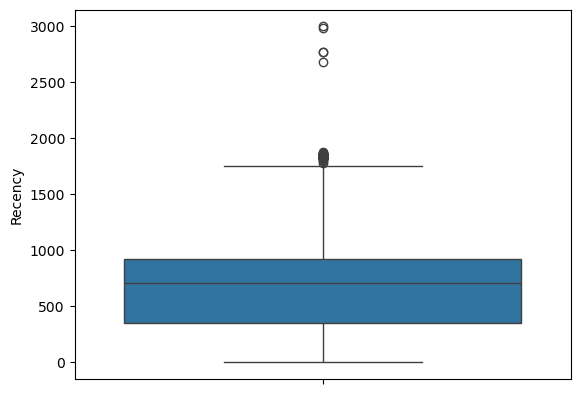

In [26]:
sns.boxplot(df_recency['Recency'])

In [27]:
df_recency_filtered =  df_recency[(df_recency['Recency'] <= 2000)]

In [28]:
df_recency_filtered

,CustomerId,LastPurchaseDate,Recency
0,876.0,2021-03-11 05:25:43,285
1,2295.0,2021-10-19 17:49:27,63
2,3476.0,2020-10-14 09:51:08,433
3,3748.0,2021-03-26 19:50:24,270
4,7301.0,2021-09-21 09:27:55,91
...,...,...,...
86178,6685326.0,2020-12-13 23:17:34,372
86179,6685341.0,2020-12-03 20:24:22,383
86180,6685346.0,2020-02-19 20:08:05,671
86181,6685347.0,2020-03-04 00:05:23,657


Calculating the **Frequency** component of the RFM analysis and removing outliers:

In [30]:
# Group the data by 'Customer Id' to count the number of purchases
frequency_df = df.drop_duplicates().groupby('CustomerId')['DateTime'].count().reset_index()

# Rename the columns
frequency_df.columns = ['CustomerId', 'Frequency']

frequency_df.head()

,CustomerId,Frequency
0,876.0,4
1,2295.0,2
2,3476.0,2
3,3748.0,8
4,7301.0,14


<Axes: ylabel='Frequency'>

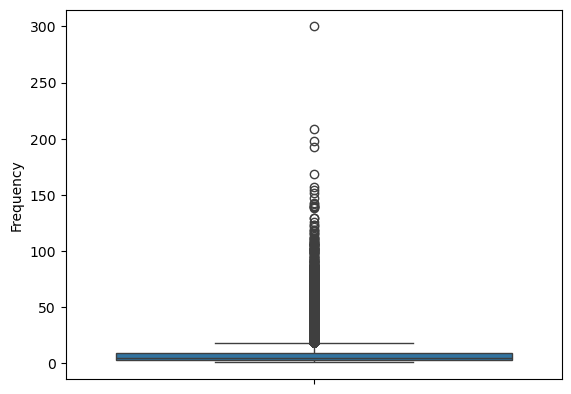

In [31]:
sns.boxplot(frequency_df['Frequency'])

In [32]:
frequency_df_filtered =  frequency_df[(frequency_df['Frequency'] <= 230)]

Calculating the **Monetary** component of the RFM analysis and removing outliers::

In [34]:
# Group the data by 'Customer Id' to get the total monetary value of customer spend on purchases 
monetary_df = df.groupby('CustomerId')['TotalPrice'].sum().reset_index()

# Rename the columns
monetary_df.columns = ['CustomerId', 'Monetary']

monetary_df.head()

,CustomerId,Monetary
0,876.0,12291.2
1,2295.0,5384.0
2,3476.0,5044.0
3,3748.0,8521.2
4,7301.0,35315.6


<Axes: ylabel='Monetary'>

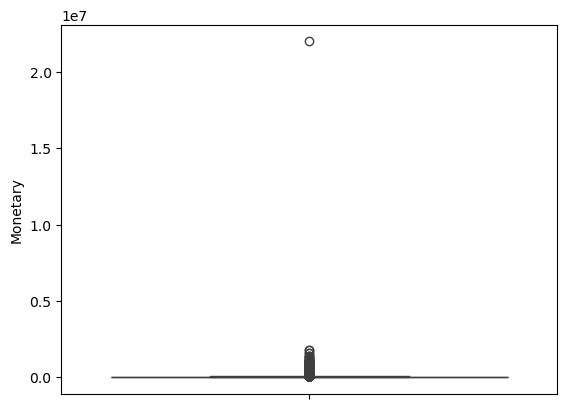

In [35]:
sns.boxplot(monetary_df['Monetary'])

In [36]:
monetary_df_filtered =  monetary_df[(monetary_df['Monetary'] <= 5000000)]

Merging all three columns in one dataframe:

In [38]:
# first step
rf_df = df_recency_filtered.merge(frequency_df_filtered, on='CustomerId')

# second step
rfm_df = rf_df.merge(monetary_df_filtered, on='CustomerId').drop(columns='LastPurchaseDate')

rfm_df.head()

,CustomerId,Recency,Frequency,Monetary
0,876.0,285,4,12291.2
1,2295.0,63,2,5384.0
2,3476.0,433,2,5044.0
3,3748.0,270,8,8521.2
4,7301.0,91,14,35315.6


#### Ranking Customers based on their Recency, Frequency, and Monetary values


In [40]:
# Assign RFM score by dividing data into 5 equal-sized quantiles and label them from ‘5’ to ‘1’
#rfm_df['R_Quartile'] = pd.qcut(rfm_df['Recency'], 5, ['5','4','3','2','1'])
#rfm_df['F_Quartile'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 5, ['1','2','3','4','5'])
#rfm_df['M_Quartile'] = pd.qcut(rfm_df['Monetary'], 5, ['1','2','3','4','5'])

# Concatenate RFM score
#rfm_df['RFM_Score'] = rfm_df.R_Quartile.astype(str) + rfm_df.F_Quartile.astype(str) + rfm_df.M_Quartile.astype(str)

#rfm_df.head()

In [41]:
rfm_df.describe()

,CustomerId,Recency,Frequency,Monetary
count,8.617700e+04,86177.000000,86177.000000,8.617700e+04
mean,4.901179e+06,629.125347,7.780928,3.085811e+04
std,1.731132e+06,336.653145,9.429292,5.447285e+04
min,8.760000e+02,0.000000,1.000000,0.000000e+00
25%,4.476639e+06,347.000000,3.000000,7.401000e+03
50%,5.478279e+06,708.000000,5.000000,1.512100e+04
75%,6.058678e+06,917.000000,9.000000,3.255405e+04
max,6.685371e+06,1879.000000,209.000000,1.794019e+06


For segmentation, we rank each RFM metric on a scale of 1 to 5, where 5 represents the highest value for Recency, Frequency, or Monetary.

We can define custom ranges for Recency, Frequency, and Monetary.
Based on the numbers above, we can establish custom thresholds for scores:

**Recency:**
- **5:** Recency ≤ 347 days (Top 25% of customers, more recent)
- **4:** Recency between 348 and 708 days
- **3:** Recency between 709 and 917 days
- **2:** Recency between 918 and 1500 days (Optional middle range)
- **1:** Recency > 1500 days (Oldest, least recent customers)  

**Frequency:**
- **5:** Frequency ≥ 10 purchases (High-frequency buyers)
- **4:** Frequency between 6 and 9 purchases
- **3:** Frequency between 3 and 5 purchases
- **2:** Frequency between 2 and 3 purchases
- **1:** Frequency = 1 purchase (Low-frequency customers)

**Monetary:**
- **5:** Monetary ≥ $\$$32,553 (Top spenders)
- **4:** Monetary between $\$$15,120 and $\$$32,553
- **3:** Monetary between $\$$ 7,400 and $\$$15,119
- **2:** Monetary between $\$$1,000 and $\$$7,400
- **1:** Monetary < $\$$1,000 (Low-spending customers)

In [43]:
# Custom range-based scoring functions

def recency_score(x):
    if x <= 347:
        return 5
    elif x <= 708:
        return 4
    elif x <= 917:
        return 3
    elif x <= 1500:
        return 2
    else:
        return 1

def frequency_score(x):
    if x >= 10:
        return 5
    elif x >= 6:
        return 4
    elif x >= 3:
        return 3
    elif x >= 2:
        return 2
    else:
        return 1

def monetary_score(x):
    if x >= 32553:
        return 5
    elif x >= 15120:
        return 4
    elif x >= 7400:
        return 3
    elif x >= 1000:
        return 2
    else:
        return 1


# Applying the scoring functions
rfm_df['R_Score'] = rfm_df['Recency'].apply(recency_score)
rfm_df['F_Score'] = rfm_df['Frequency'].apply(frequency_score)
rfm_df['M_Score'] = rfm_df['Monetary'].apply(monetary_score)

In [68]:
# Calculating final RFM score
rfm_df['RFM_Score'] = rfm_df['R_Score'].map(str) + rfm_df['F_Score'].map(str) + rfm_df['M_Score'].map(str)

# Preview the results
rfm_df.head()

,CustomerId,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,876.0,285,4,12291.2,5,3,3,533
1,2295.0,63,2,5384.0,5,2,2,522
2,3476.0,433,2,5044.0,4,2,2,422
3,3748.0,270,8,8521.2,5,4,3,543
4,7301.0,91,14,35315.6,5,5,5,555


#### Segmenting Customers

- **Champions:** Customers who have made recent purchases, buy frequently, and spend the most. This segment is further broken down into two subsegments:
  - **VIP Champions:** The highest spenders among frequent and recent buyers.
  - **Average Champions:** Frequent and recent buyers with moderate spending. 
- **Loyal Customers:** Customers with above-average recency and frequency, and moderate-to-high monetary values, though they may not have made a very recent purchase. This segment is subdivided into:
  - **High-Spending Loyal Customers:** Loyal customers who spend significantly.
  - **Moderate-Spending Loyal Customers:** Customers who purchase frequently but with moderate spending.
- **Potential Loyalists:** Newer customers who have made multiple purchases and already spent a decent amount, showing potential to become loyal customers.
- **Recent Customers:** Customers who have made a recent purchase but do not buy frequently. These customers may still be in the early stages of engagement.
- **At-Risk Customers:** Customers who previously purchased frequently and spent a lot but have not made a purchase in a while. They need re-engagement before they churn.
- **Attention Needed Customers:** Customers with above-average recency, frequency, and monetary values, but who require engagement to continue purchasing.
- **Hibernating Customers:** Customers with low recency but who may have had moderate or higher frequency and spending levels in the past.
- **Lost Customers:** Customers with the lowest scores for recency, frequency, and monetary value. These customers are at high risk of churn or may have already disengaged.

Step 1 - Segmenting by Recency and Frequency:

In [88]:
def rfm_segment_step1(row):
    # Champions: R = 5, F = 5
    if row['R_Score'] == 5 and row['F_Score'] == 5:
        return 'Champions'

    # Lost Customers: R = 1, F = 1
    elif row['R_Score'] == 1 and row['F_Score'] == 1:
        return 'Lost Customers'

    # Lost with high frequency: R = 1, F = 2, 3, 4, 5
    elif row['R_Score'] == 1 and row['F_Score'] in [2, 3, 4, 5]:
        return 'Lost with High Frequency'

    # At-Risk Customers: R = 2, 3, F = 1, 2
    elif row['R_Score'] in [2, 3] and row['F_Score'] in [1, 2]:
        return 'At-Risk Customers'

    # At-Risk with High Frequency: R = 2, 3, F = 3, 4, 5
    elif row['R_Score'] in [2, 3] and row['F_Score'] in [3, 4, 5]:
        return 'At-Risk with High Frequency'

    # Attention Needed: R = 4, F = 1, 2, 3
    elif row['R_Score'] == 4 and row['F_Score'] in [1, 2, 3]:
        return 'Attention Needed'

    # Loyal Customers: R = 4, 5, F = 3, 4, 5
    elif row['R_Score'] in [4, 5] and row['F_Score'] in [3, 4, 5]:
        return 'Loyal Customers'

    # Recent Customers: R = 5, F = 1, 2
    elif row['R_Score'] == 5 and row['F_Score'] in [1, 2]:
        return 'Recent Customers'

    # Fallback: Others
    else:
        return 'Others'

# Apply the Step 1 segmentation
rfm_df['Segment_Step1'] = rfm_df.apply(rfm_segment_step1, axis=1)


Step 2 - Adding Monetary Value to the existing segmentation:

In [90]:
def rfm_segment_step2(row):
    # Lost with High Frequency: M = 1, 2, 3 (average customers), M = 4, 5 (VIP)
    if row['Segment_Step1'] == 'Lost with High Frequency':
        if row['M_Score'] in [1, 2, 3]:
            return 'Lost with High Frequency - Average Spenders'
        elif row['M_Score'] in [4, 5]:
            return 'Lost with High Frequency - High Spenders'

    # At-Risk with High Frequency: M = 1, 2, 3 (average customers), M = 4, 5 (VIP)
    elif row['Segment_Step1'] == 'At-Risk with High Frequency':
        if row['M_Score'] in [1, 2, 3]:
            return 'At-Risk with High Frequency - Average Spenders'
        elif row['M_Score'] in [4, 5]:
            return 'At-Risk with High Frequency - High Spenders'

    # Loyal Customers: M = 1, 2, 3 (average customers), M = 4, 5 (VIP)
    elif row['Segment_Step1'] == 'Loyal Customers':
        if row['M_Score'] in [1, 2, 3]:
            return 'Loyal Customers - Average Spenders'
        elif row['M_Score'] in [4, 5]:
            return 'Loyal Customers - High Spenders'

    # Champions: M = 1, 2, 3 (average customers), M = 4, 5 (VIP)
    elif row['Segment_Step1'] == 'Champions':
        if row['M_Score'] in [1, 2, 3]:
            return 'Champions - Average Spenders'
        elif row['M_Score'] in [4, 5]:
            return 'Champions - High Spenders'

    # At-Risk: No further breakdown needed
    elif row['Segment_Step1'] == 'At-Risk Customers':
        return 'At-Risk Customers'

    # Attention Needed: No further breakdown needed
    elif row['Segment_Step1'] == 'Attention Needed':
        return 'Attention Needed'

    # Recent Customers: No further breakdown needed
    elif row['Segment_Step1'] == 'Recent Customers':
        return 'Recent Customers'

    # Lost Customers: No further breakdown needed
    elif row['Segment_Step1'] == 'Lost Customers':
        return 'Lost Customers'

    # Fallback: Others
    else:
        return 'Others'

# Apply the Step 2 segmentation
rfm_df['Segment_Final'] = rfm_df.apply(rfm_segment_step2, axis=1)


In [92]:
rfm_df

,CustomerId,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment_Step1,Segment_Final
0,876.0,285,4,12291.2,5,3,3,533,Loyal Customers,Loyal Customers - Average Spenders
1,2295.0,63,2,5384.0,5,2,2,522,Recent Customers,Recent Customers
2,3476.0,433,2,5044.0,4,2,2,422,Attention Needed,Attention Needed
3,3748.0,270,8,8521.2,5,4,3,543,Loyal Customers,Loyal Customers - Average Spenders
4,7301.0,91,14,35315.6,5,5,5,555,Champions,Champions - High Spenders
...,...,...,...,...,...,...,...,...,...,...
86172,6685326.0,372,9,79182.0,4,4,5,445,Loyal Customers,Loyal Customers - High Spenders
86173,6685341.0,383,5,8586.0,4,3,3,433,Attention Needed,Attention Needed
86174,6685346.0,671,13,103612.0,4,5,5,455,Loyal Customers,Loyal Customers - High Spenders
86175,6685347.0,657,1,699.0,4,1,1,411,Attention Needed,Attention Needed


#### Visualizing the customer segments

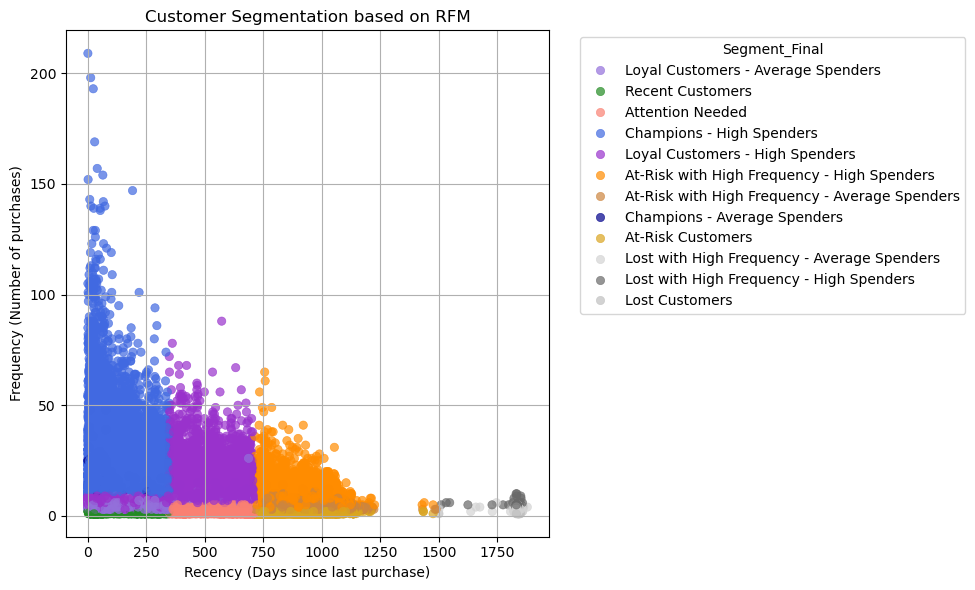

In [164]:
# Create a scatter plot
plt.figure(figsize=(10, 6))

# Define a color palette for each segment
palette = {
    'Champions - High Spenders': 'royalblue', 
    'Champions - Average Spenders': 'darkblue', 
    'Loyal Customers - High Spenders': 'darkorchid', 
    'Loyal Customers - Average Spenders': 'mediumpurple', 
    'Recent Customers': 'forestgreen', 
    'At-Risk with High Frequency - Average Spenders': 'peru', 
    'At-Risk with High Frequency - High Spenders': 'darkorange', 
    'At-Risk Customers': 'goldenrod',
    'Attention Needed': 'salmon', 
    'Lost with High Frequency - Average Spenders': 'lightgray',
    'Lost with High Frequency - High Spenders': 'dimgray',
    'Lost Customers': 'silver'
}

# Scatter plot of Recency vs Frequency, colored by Segment
sns.scatterplot(
    data=rfm_df,
    x='Recency', y='Frequency',
    hue='Segment_Final',
    palette=palette,
    alpha=0.7,
    edgecolor=None
)

# Customizing the plot
plt.title('Customer Segmentation based on RFM')
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Frequency (Number of purchases)')
plt.legend(title='Segment_Final', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

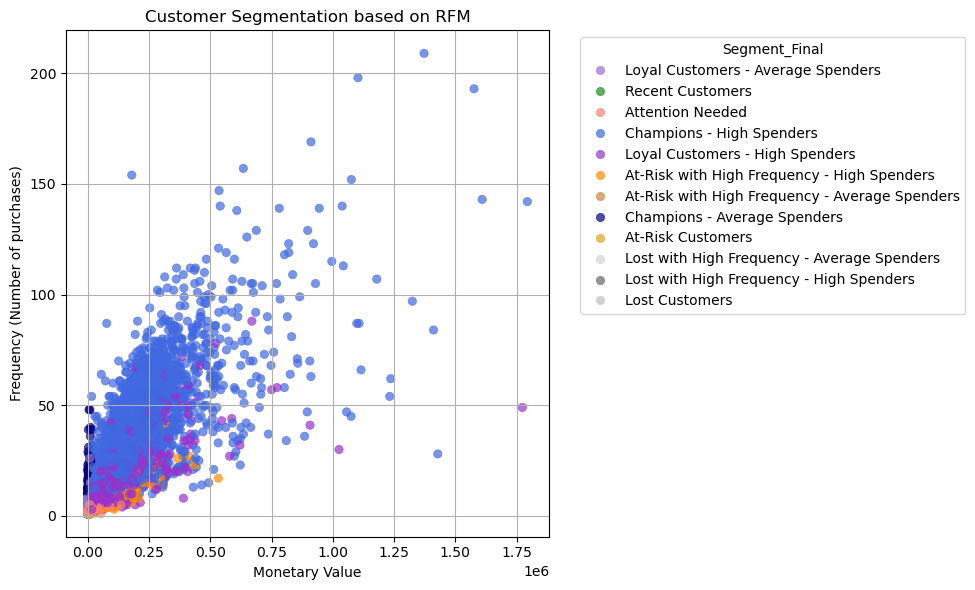

In [162]:
# Create a scatter plot
plt.figure(figsize=(10, 6))

# Define a color palette for each segment
palette = {
    'Champions - High Spenders': 'royalblue', 
    'Champions - Average Spenders': 'darkblue', 
    'Loyal Customers - High Spenders': 'darkorchid', 
    'Loyal Customers - Average Spenders': 'mediumpurple', 
    'Recent Customers': 'forestgreen', 
    'At-Risk with High Frequency - Average Spenders': 'peru', 
    'At-Risk with High Frequency - High Spenders': 'darkorange', 
    'At-Risk Customers': 'goldenrod',
    'Attention Needed': 'salmon', 
    'Lost with High Frequency - Average Spenders': 'lightgray',
    'Lost with High Frequency - High Spenders': 'dimgray',
    'Lost Customers': 'silver'
}

# Scatter plot of Frequency vs Monetary Value, colored by Segment
sns.scatterplot(
    data=rfm_df,
    x='Monetary', y='Frequency',
    hue='Segment_Final',
    palette=palette,
    alpha=0.7,
    edgecolor=None
)

# Customizing the plot
plt.title('Customer Segmentation based on RFM')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency (Number of purchases)')
plt.legend(title='Segment_Final', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

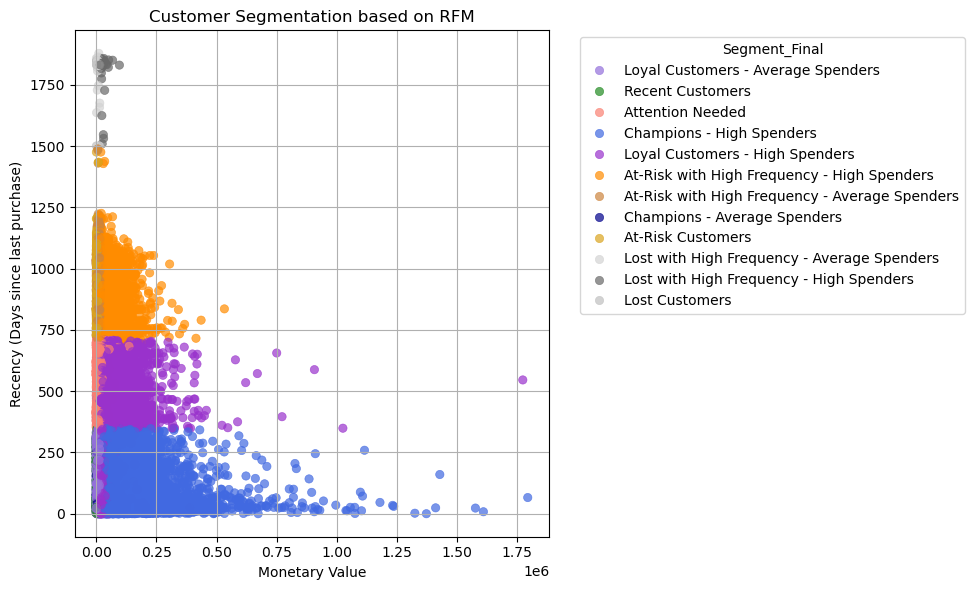

In [160]:
# Create a scatter plot
plt.figure(figsize=(10, 6))

# Define a color palette for each segment
palette = {
    'Champions - High Spenders': 'royalblue', 
    'Champions - Average Spenders': 'darkblue', 
    'Loyal Customers - High Spenders': 'darkorchid', 
    'Loyal Customers - Average Spenders': 'mediumpurple', 
    'Recent Customers': 'forestgreen', 
    'At-Risk with High Frequency - Average Spenders': 'peru', 
    'At-Risk with High Frequency - High Spenders': 'darkorange', 
    'At-Risk Customers': 'goldenrod',
    'Attention Needed': 'salmon', 
    'Lost with High Frequency - Average Spenders': 'lightgray',
    'Lost with High Frequency - High Spenders': 'dimgray',
    'Lost Customers': 'silver'
}

# Scatter plot of Recency vs Monetary Value, colored by Segment
sns.scatterplot(
    data=rfm_df,
    x='Monetary', y='Recency',
    hue='Segment_Final',
    palette=palette,
    alpha=0.7,
    edgecolor=None
)

# Customizing the plot
plt.title('Customer Segmentation based on RFM')
plt.xlabel('Monetary Value')
plt.ylabel('Recency (Days since last purchase)')
plt.legend(title='Segment_Final', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

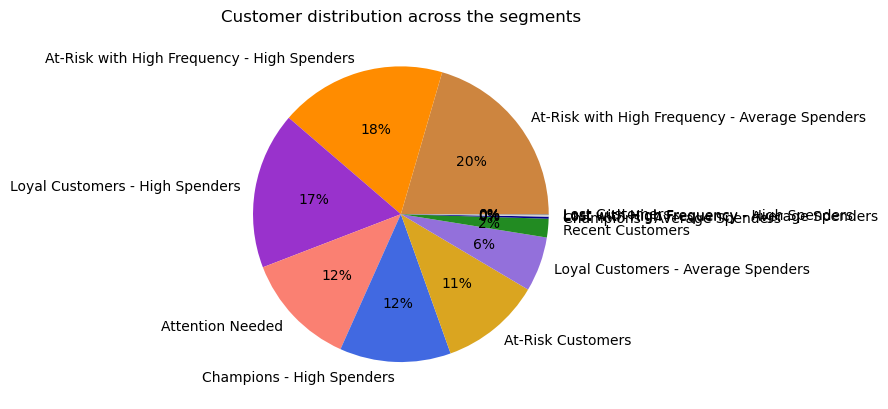

In [158]:
# Define updated palette for each segment
palette = {
    'Champions - High Spenders': 'royalblue', 
    'Champions - Average Spenders': 'darkblue', 
    'Loyal Customers - High Spenders': 'darkorchid', 
    'Loyal Customers - Average Spenders': 'mediumpurple', 
    'Recent Customers': 'forestgreen', 
    'At-Risk with High Frequency - Average Spenders': 'peru', 
    'At-Risk with High Frequency - High Spenders': 'darkorange', 
    'At-Risk Customers': 'goldenrod',
    'Attention Needed': 'salmon', 
    'Lost with High Frequency - Average Spenders': 'lightgray',
    'Lost with High Frequency - High Spenders': 'dimgray',
    'Lost Customers': 'silver'
}

# Extract counts for each segment and map corresponding colors from the palette
segment_counts = rfm_df.Segment_Final.value_counts()
colors = [palette[segment] for segment in segment_counts.index if segment in palette]

# Create pie chart
plt.pie(segment_counts, labels=segment_counts.index, colors=colors, autopct='%.0f%%')
# Customizing the plot
plt.title('Customer distribution across the segments')
# Show the plot
plt.show()

In [104]:
segment_counts

Segment_Final
At-Risk with High Frequency - Average Spenders    17658
At-Risk with High Frequency - High Spenders       15688
Loyal Customers - High Spenders                   14780
Attention Needed                                  10738
Champions - High Spenders                         10475
At-Risk Customers                                  9499
Loyal Customers - Average Spenders                 5162
Recent Customers                                   1754
Champions - Average Spenders                        200
Lost with High Frequency - Average Spenders         154
Lost with High Frequency - High Spenders             58
Lost Customers                                       11
Name: count, dtype: int64

#### **Recommendations**:

The distribution shows that a significant portion of customers (38%) are either "At-Risk with High Frequency - Average Spenders" (20%) or "At-Risk with High Frequency - High Spenders" (18%). These segments require immediate attention for re-engagement, as they were once valuable customers but are now at risk of churning. We can offer exclusive promotions, targeted email campaigns, and personalized incentives to encourage them to return to active buying.

Another important group includes "Loyal Customers - High Spenders" (17%) and "Champions - High Spenders" (12%). These customers are highly valuable and should be treated as VIPs. Offering them rewards, early access to new products, and encouraging them to provide reviews or act as brand ambassadors will help solidify their loyalty. Personalized offers and invitations to exclusive events can also strengthen their connection to the brand.

"Attention Needed Customers" (12%) and "At-Risk Customers" (11%) are at risk of disengagement. For these segments, personalized product recommendations, limited-time discounts, and curated product selections can help maintain their engagement and prevent them from falling into the "Lost" category.

Finally, the "Loyal Customers - Average Spenders" (6%) and "Recent Customers" (2%) present key opportunities for growth. Nurturing these customers through loyalty programs, personalized communications, and recommending products based on their purchase history can encourage more frequent spending and build long-term relationships.